In [2]:
import networkx  as nx
import pandas as pd
import numpy as np



In [3]:
df = pd.read_pickle('../../Files/test0606__cross.pickle')

In [4]:
df.head()

,subreddit,subreddit_id,crosspost_parent,crosspost_parent_id,subreddit_subscribers,crosspost_parent_subs,count,crosspost_parent_num,total
0,CovidVaccinated,t5_3gppqs,MapPorn,t5_2si92,4351.0,1252559,1,1,1
1,CovidVaccinated,t5_3gppqs,dataisbeautiful,t5_2tk95,4196.0,15347693,1,2,1
2,DebateVaccines,t5_3jwf7,AntiVaxxers,t5_384mz,2354.5,27397,2,26,2
3,DebateVaccines,t5_3jwf7,ConspiracyUltra,t5_3flq3y,2711.869565,236,23,23,23
4,DebateVaccines,t5_3jwf7,Coronavirus,t5_2x4yx,2585.5,2365057,4,5,12


In [5]:
G = nx.MultiDiGraph()

In [6]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)
G.add_nodes_from(res)

In [7]:
res.sort()

In [8]:
for i in res:
    print(i)

10UTennis
10s
13or30
1950s
196
197
2007scape
200YearsAgo
2019_n_CoV_J_senpan
2020
2020Election
2020PoliceBrutality
2020electioncrisis
2021
2624
2ALiberals
2Caucasian4you
2MiddleEast4you
2b2t
2balkan4you
2busty2hide
2healthbars
2mad4madlads
2meirl42meirl4meirl
2meirl4meirl
2visegrad4you
30ROCK
321
3Dprinting
40kOrkScience
4FuckSakes
4PanelCringe
4Runner
4chan
4x4
5050
52BooksForCommunists
52weeksofcooking
5555555
5MeODMT
6thForm
725er
80sAlternative
90DayFiance
90dayfianceuncensored
911FOX
911FlightSquad
911truthers
9_11_CGI_Planes
A24
AAAAAAAAAAAAAAAAA
AAAcontent
AAVideoArchive
ABCDesis
ABoringDystopia
ACAB
ACK
ACPocketCamp
ADHD
AEWOfficial
AIDKE
AIandRobotics
AMA
AMDLaptops
ANI_COMMUNISM
ANormalDayInAmerica
ANormalDayInAustralia
ANormalDayInChina
ANormalDayInIndia
ANormalDayInRussia
AOC
APStudents
ARMAS_BR
ATAAE
ATBGE
ATFopenup
ATHX
ATLA
AapKeMaalik
AbandonedPorn
Abhigyan
AbolishTheMonarchy
Abortiondebate
AbruptChaos
AbsoluteUnits
AbsurdMovies
AcademicBiblical
Acadiana
AccidentalComed

In [9]:
e = df[['subreddit', 'crosspost_parent', 'count']].values.tolist()

In [10]:
G.add_weighted_edges_from(e)

In [19]:
G

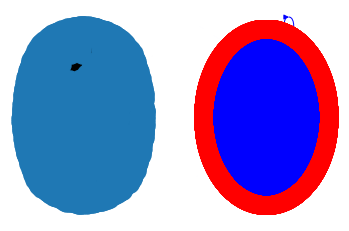

In [11]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

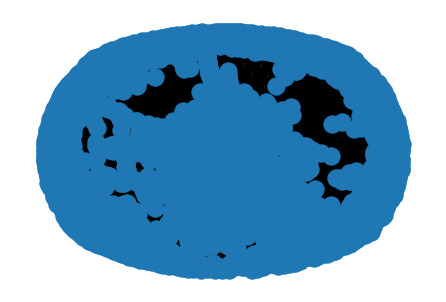

In [12]:
nx.draw(G)

In [13]:
f = pd.DataFrame(nx.degree(G))

In [14]:
f.columns = ('Subreddit', 'Degree')

In [15]:
f.sort_values('Degree', ascending=False).head(60)

,Subreddit,Degree
188,interestingasfuck,535
170,PublicFreakout,531
124,u_rklokh,456
39,JustUnsubbed,415
182,awfuleverything,343
5,ABoringDystopia,325
3,NoNewNormal,290
8,Anarcho_Capitalism,272
198,science,257
105,politics,241


In [54]:
df = pd.read_pickle('../../Files/test0606_temp.pickle')

In [32]:
from psaw import PushshiftAPI

api = PushshiftAPI()

In [35]:
gen = api.search_submissions(subreddit = 'Coronavirus', limit = 1000)

In [36]:
results = list(gen)           
temp = pd.DataFrame([thing.d_ for thing in results])

In [37]:
temp.head()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,whitelist_status,wls,created,author_cakeday,removed_by_category,link_flair_css_class,media,media_embed,secure_media,secure_media_embed
0,[],False,Viewfromthe31stfloor,#0266b3,None,[],24769a0e-5574-11ec-b310-9e1ed90b5602,Boosted! ✨💉✅,light,text,...,all_ads,6,1.654514e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,VacationItchy,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654510e+09,True,moderator,NaN,NaN,NaN,NaN,NaN
2,[],False,roujayn,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654504e+09,NaN,moderator,NaN,NaN,NaN,NaN,NaN
3,[],False,jackspratdodat,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654504e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,SanatanCharacters,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654503e+09,NaN,moderator,NaN,NaN,NaN,NaN,NaN


In [38]:
temp[['url', 'selftext']]

,url,selftext
0,https://www.nytimes.com/2022/06/03/health/covi...,
1,http://news-analysis4.blogspot.com/2022/06/Wha...,
2,https://www.ourhealthinworldwide.com/2022/05/t...,
3,https://www.nbcnews.com/news/us-news/covid-vac...,
4,https://sanatancharacters.blogspot.com/2022/06...,
...,...,...
991,https://www.cnbc.com/2022/05/10/experts-how-to...,
992,https://www.timesofisrael.com/israeli-study-sh...,
993,https://www.cnn.com/2022/05/10/health/covid-19...,
994,https://www.nytimes.com/2022/05/10/health/cdc-...,


In [39]:
gen2 = api.search_submissions(id = 'v5yci0')

In [40]:
results = list(gen2)           
temp2 = pd.DataFrame([thing.d_ for thing in results])

KeyboardInterrupt: 